# Handwritten Classification using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras

2023-09-30 18:51:00.460841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Loading the MNIST dataset
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the ANN Model Architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Convert the 28x28 Image into a 1D Array
    keras.layers.Dense(128,activation='relu'),  # Hidden Layer with 128 Units
    keras.layers.Dense(10,activation='softmax')  #Output Layer with 10 units
])

In [5]:
# Compile the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [6]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2611 - accuracy: 0.9254 - val_loss: 0.1470 - val_accuracy: 0.9536
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1154 - accuracy: 0.9660 - val_loss: 0.0993 - val_accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0798 - accuracy: 0.9765 - val_loss: 0.0865 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0861 - val_accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0808 - val_accuracy: 0.9769


In [7]:
# Predict the Labels of the test Set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
# Print the Confusion Matrix
print('Confusion Matrix')
print(cm)

# Calculate the Accuracy
acc=accuracy_score(y_test,y_pred)

# Printing the Accuracy
print('Accuracy :',acc)

Confusion Matrix
[[ 973    0    1    1    1    1    0    0    2    1]
 [   0 1113    3    3    0    1    2    0   13    0]
 [   5    0 1005    1    4    0    2    7    8    0]
 [   0    0    1  998    0    2    1    5    2    1]
 [   1    0    3    1  956    0    4    2    2   13]
 [   3    0    0   12    1  869    3    1    2    1]
 [   9    2    1    1    4    3  935    0    3    0]
 [   0    3   10    2    1    0    0 1004    3    5]
 [   5    0    2    7    4    5    0    2  947    2]
 [   4    2    0   12    6    5    0    6    5  969]]
Accuracy : 0.9769


## Plotting

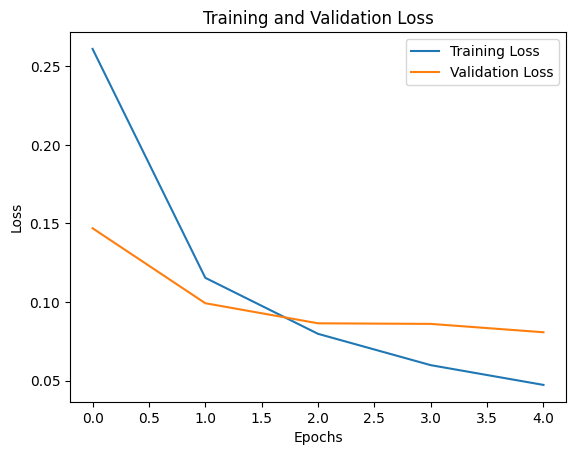

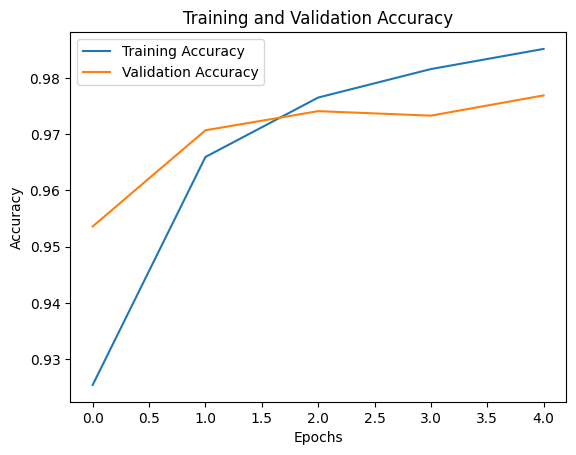

In [9]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotting the Training and Validation Loss
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()